In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import math
import matplotlib.dates as mdate
import numpy as np
import datetime as dt
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
dates_cleaned = pd.read_csv("/Users/anzhelikabelozerova/Downloads/dummies_cleaned.csv", index_col=0) 

In [3]:
dates_cleaned

,Date,Country,energy_price,biomass,gas,nuclear,year,month,day,hour,...,week_number_51,week_number_52,week_number_53,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,2015-01-01 00:00:00,CH,44.94,252.200902,1180.283774,7185.089448,2015,1,1,0,...,0,0,0,0,0,0,1,0,0,0
1,2015-01-01 00:00:00,CZ,26.48,135.000000,172.000000,2596.000000,2015,1,1,0,...,0,0,0,0,0,0,1,0,0,0
2,2015-01-01 00:00:00,DK_1,25.02,18.000000,233.000000,7185.089448,2015,1,1,0,...,0,0,0,0,0,0,1,0,0,0
3,2015-01-01 00:00:00,DK_2,27.38,25.000000,304.000000,7185.089448,2015,1,1,0,...,0,0,0,0,0,0,1,0,0,0
4,2015-01-01 00:00:00,EE,27.38,252.200902,1180.283774,7185.089448,2015,1,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3294775,2023-12-31 00:00:00,SE_2,44.87,252.200902,1180.283774,7185.089448,2023,12,31,0,...,0,1,0,0,0,0,0,0,0,1
3294776,2023-12-31 00:00:00,SE_3,44.87,252.200902,1180.283774,7185.089448,2023,12,31,0,...,0,1,0,0,0,0,0,0,0,1
3294777,2023-12-31 00:00:00,SE_4,44.87,252.200902,1180.283774,7185.089448,2023,12,31,0,...,0,1,0,0,0,0,0,0,0,1
3294778,2023-12-31 00:00:00,SI,33.30,252.200902,1180.283774,7185.089448,2023,12,31,0,...,0,1,0,0,0,0,0,0,0,1


In [4]:
for col in dates_cleaned.columns:
    print(col)

Date
Country
energy_price
biomass
gas
nuclear
year
month
day
hour
week_number
day_of_week
weekend
Country_BE
Country_BG
Country_CH
Country_CZ
Country_Combined_AT_DE_AT_LU
Country_DK_1
Country_DK_2
Country_EE
Country_ES
Country_FI
Country_FR
Country_GB
Country_GR
Country_HR
Country_HU
Country_IT_BRNN
Country_IT_CNOR
Country_IT_CSUD
Country_IT_FOGN
Country_IT_GR
Country_IT_NORD
Country_IT_NORD_AT
Country_IT_NORD_CH
Country_IT_NORD_FR
Country_IT_NORD_SI
Country_IT_PRGP
Country_IT_SACO_AC
Country_IT_SACO_DC
Country_IT_SARD
Country_IT_SICI
Country_IT_SUD
Country_LV
Country_ME
Country_MK
Country_NL
Country_NO_1
Country_NO_2
Country_NO_3
Country_NO_4
Country_NO_5
Country_PL
Country_PT
Country_RO
Country_RS
Country_SE_1
Country_SE_2
Country_SE_3
Country_SE_4
Country_SI
Country_SK
year_2015
year_2016
year_2017
year_2018
year_2019
year_2020
year_2021
year_2022
year_2023
month_1
month_2
month_3
month_4
month_5
month_6
month_7
month_8
month_9
month_10
month_11
month_12
day_1
day_2
day_3
day_4
day_

In [5]:
dates_shift = dates_cleaned.copy()

In [6]:
dates_shift['energy_price_target'] = dates_shift.groupby('Country')['energy_price'].shift(-12)
dates_shift.dropna(inplace=True)

In [7]:
dates_shift.head(50)

,Date,Country,energy_price,biomass,gas,nuclear,year,month,day,hour,...,week_number_52,week_number_53,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,energy_price_target
0,2015-01-01 00:00:00,CH,44.94,252.200902,1180.283774,7185.089448,2015,1,1,0,...,0,0,0,0,0,1,0,0,0,35.09
1,2015-01-01 00:00:00,CZ,26.48,135.000000,172.000000,2596.000000,2015,1,1,0,...,0,0,0,0,0,1,0,0,0,24.87
2,2015-01-01 00:00:00,DK_1,25.02,18.000000,233.000000,7185.089448,2015,1,1,0,...,0,0,0,0,0,1,0,0,0,16.08
3,2015-01-01 00:00:00,DK_2,27.38,25.000000,304.000000,7185.089448,2015,1,1,0,...,0,0,0,0,0,1,0,0,0,16.08
4,2015-01-01 00:00:00,EE,27.38,252.200902,1180.283774,7185.089448,2015,1,1,0,...,0,0,0,0,0,1,0,0,0,25.91
5,2015-01-01 00:00:00,ES,50.10,447.000000,4844.000000,7096.000000,2015,1,1,0,...,0,0,0,0,0,1,0,0,0,45.14
6,2015-01-01 00:00:00,FI,27.38,252.200902,1180.283774,7185.089448,2015,1,1,0,...,0,0,0,0,0,1,0,0,0,25.91
7,2015-01-01 00:00:00,GB,0.00,252.200902,1180.283774,7185.089448,2015,1,1,0,...,0,0,0,0,0,1,0,0,0,0.00
8,2015-01-01 00:00:00,GR,51.10,252.200902,1180.283774,7185.089448,2015,1,1,0,...,0,0,0,0,0,1,0,0,0,52.18
9,2015-01-01 00:00:00,HU,45.07,93.000000,607.250000,1928.333333,2015,1,1,0,...,0,0,0,0,0,1,0,0,0,26.25


In [8]:
dates_shift.sort_index(level='Date', inplace=True)
X = dates_shift.drop(['energy_price', 'energy_price_target', 'Country', 'Date'], axis=1)  # Exclude original price from features
y = dates_shift['energy_price_target']

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=20)

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Initialize a list to store the mean squared error for each fold
mse_scores = []

# Apply TimeSeriesSplit to df
for i, (train_index, test_index) in enumerate(tscv.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the Random Forest model
    model.fit(X_train, y_train)

    # Predict on the test data
    predictions = model.predict(X_test)

    # Calculate MSE for the current fold
    mse = mean_squared_error(y_test, predictions)
    mse_scores.append(mse)

    # Print fold results
    print(f"Fold {i}:")
    print(f"  Train Indices: {train_index}")
    print(f"  Test Indices: {test_index}")
    print(f"  Mean Squared Error: {mse}")

Fold 0:
  Train Indices: [     0      1      2 ... 156877 156878 156879]
  Test Indices: [156880 156881 156882 ... 313742 313743 313744]
  Mean Squared Error: 32936.215309644824
Fold 1:
  Train Indices: [     0      1      2 ... 313742 313743 313744]
  Test Indices: [313745 313746 313747 ... 470607 470608 470609]
  Mean Squared Error: 525.8802293063135
Fold 2:
  Train Indices: [     0      1      2 ... 470607 470608 470609]
  Test Indices: [470610 470611 470612 ... 627472 627473 627474]
  Mean Squared Error: 36996.56233169949
Fold 3:
  Train Indices: [     0      1      2 ... 627472 627473 627474]
  Test Indices: [627475 627476 627477 ... 784337 784338 784339]
  Mean Squared Error: 28512.60855748512
Fold 4:
  Train Indices: [     0      1      2 ... 784337 784338 784339]
  Test Indices: [784340 784341 784342 ... 941202 941203 941204]
  Mean Squared Error: 6941.737910488647
Fold 5:
  Train Indices: [     0      1      2 ... 941202 941203 941204]
  Test Indices: [ 941205  941206  941207 

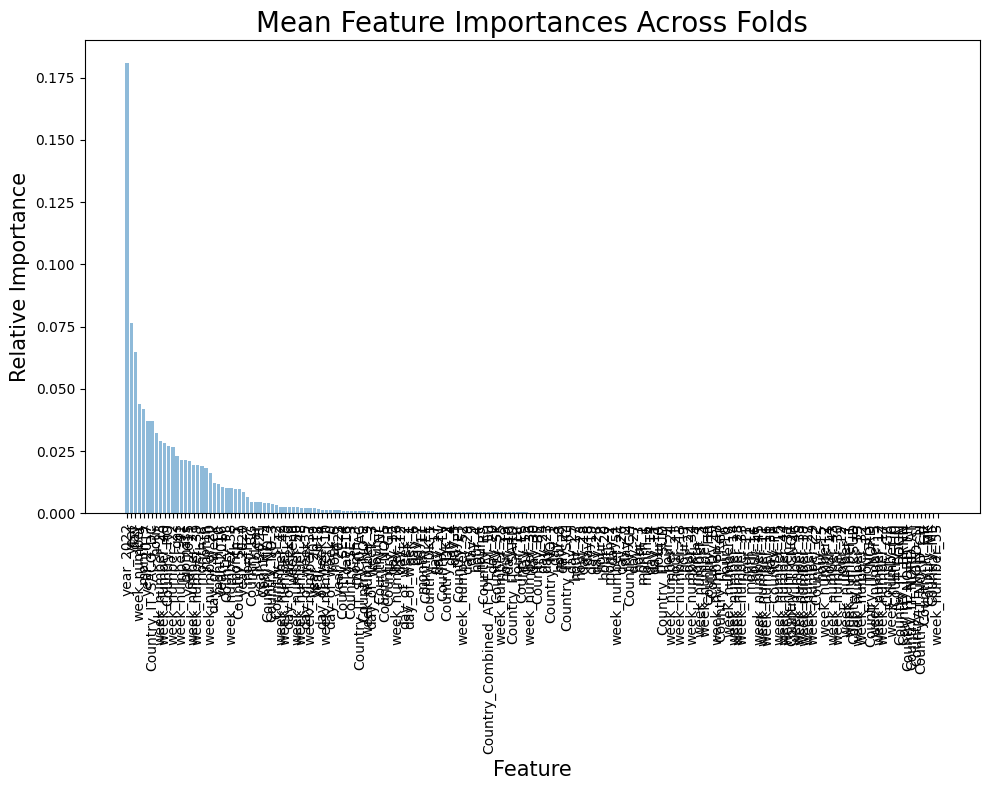

In [10]:
all_feature_importances = []

feature_importances = model.feature_importances_

# Append feature importances to the list
all_feature_importances.append(feature_importances)

# Convert list of feature importances to a numpy array
all_feature_importances = np.array(all_feature_importances)

# Calculate mean feature importance across all folds
mean_feature_importance = np.mean(all_feature_importances, axis=0)

# Sort the mean feature importances in descending order and get their indices
sorted_indices = np.argsort(mean_feature_importance)[::-1]

# Create the plot
plt.figure(figsize=(10, 8))
plt.title('Mean Feature Importances Across Folds', fontsize=20)
plt.bar(range(len(mean_feature_importance)), mean_feature_importance[sorted_indices], align='center', alpha=0.5)
plt.xticks(range(len(mean_feature_importance)), X_train.columns[sorted_indices], rotation=90)
plt.ylabel('Relative Importance', fontsize=15)
plt.xlabel('Feature', fontsize=15)
plt.tight_layout()
plt.show()

In [ ]:
top_features = 15
plt.figure(figsize=(15, 8))
plt.title('Mean Feature Importances Across Folds', fontsize=20)
bars = plt.bar(range(top_features), mean_feature_importance[sorted_indices][:top_features], align='center', alpha=0.5)
plt.xticks(range(top_features), X_train.columns[sorted_indices][:top_features], rotation=45, fontsize=12)  
plt.ylabel('Relative Importance', fontsize=15)
plt.xlabel('Feature', fontsize=15)
plt.tight_layout()
plt.show()

In [6]:
dates_shift_exclude = pd.read_csv("notebooks/dates_shift_exclude.csv", index_col=0) 

In [7]:
dates_shift_exclude.sort_index(level='Date', inplace=True)
X_2 = dates_shift_exclude.drop(['energy_price', 'energy_price_target', 'Country', 'Date'], axis=1) 
y_2 = dates_shift_exclude['energy_price_target']

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=20)

# Initialize the Random Forest Regressor
model_2 = RandomForestRegressor(n_estimators=100, random_state=42)

# Initialize a list to store the mean squared error for each fold
mse_scores_2 = []

# Apply TimeSeriesSplit to df
for i, (train_index, test_index) in enumerate(tscv.split(X_2)):
    X_train_2, X_test_2 = X_2.iloc[train_index], X_2.iloc[test_index]
    y_train_2, y_test_2 = y_2.iloc[train_index], y_2.iloc[test_index]

    # Train the Random Forest model
    model_2.fit(X_train_2, y_train_2)

    # Predict on the test data
    predictions_2 = model_2.predict(X_test_2)

    # Calculate MSE for the current fold
    mse_2 = mean_squared_error(y_test_2, predictions_2)
    mse_scores_2.append(mse_2)

    # Print fold results
    print(f"Fold {i}:")
    print(f"  Train Indices: {train_index}")
    print(f"  Test Indices: {test_index}")
    print(f"  Mean Squared Error: {mse_2}")

    # Get feature importances
    feature_importances = model_2.feature_importances_

    # Append feature importances to the list
    all_feature_importances = []

    # Append feature importances to the list
    all_feature_importances.append(feature_importances)


Fold 0:
  Train Indices: [     0      1      2 ... 130901 130902 130903]
  Test Indices: [130904 130905 130906 ... 261796 261797 261798]
  Mean Squared Error: 175.23039623056633
Fold 1:
  Train Indices: [     0      1      2 ... 261796 261797 261798]
  Test Indices: [261799 261800 261801 ... 392691 392692 392693]
  Mean Squared Error: 176.97532889425085
Fold 2:
  Train Indices: [     0      1      2 ... 392691 392692 392693]
  Test Indices: [392694 392695 392696 ... 523586 523587 523588]
  Mean Squared Error: 146.1232723381237
Fold 3:
  Train Indices: [     0      1      2 ... 523586 523587 523588]
  Test Indices: [523589 523590 523591 ... 654481 654482 654483]
  Mean Squared Error: 148.12158807954586
Fold 4:
  Train Indices: [     0      1      2 ... 654481 654482 654483]
  Test Indices: [654484 654485 654486 ... 785376 785377 785378]
  Mean Squared Error: 505.658041902896
Fold 5:
  Train Indices: [     0      1      2 ... 785376 785377 785378]
  Test Indices: [785379 785380 785381 ..

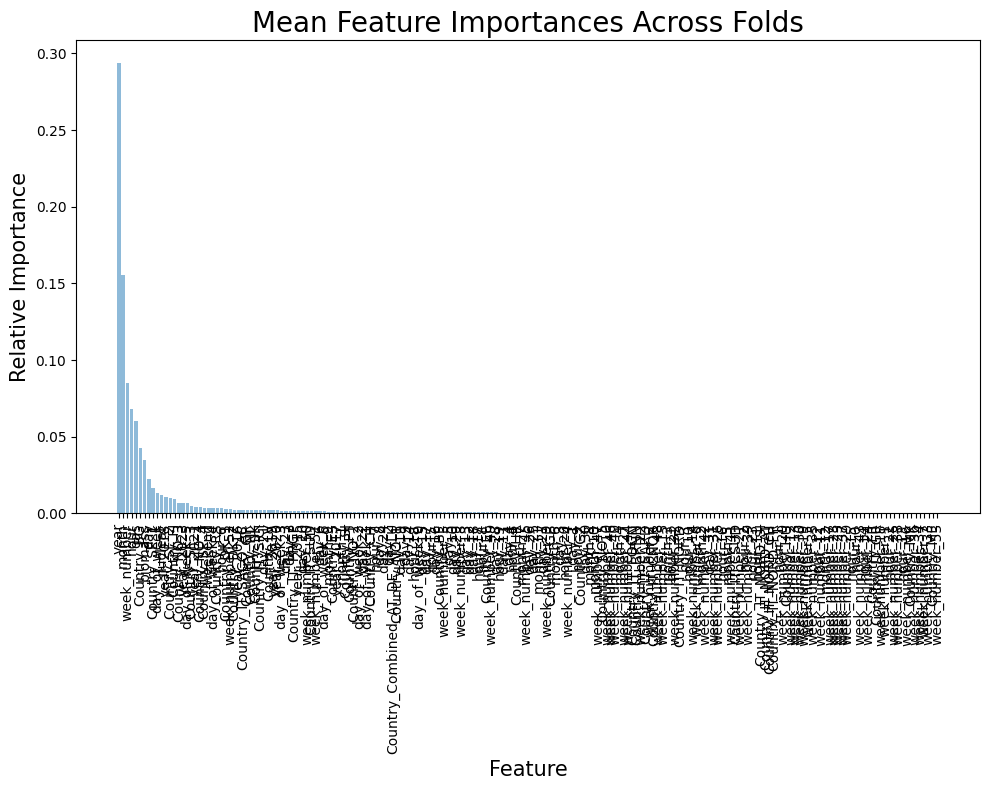

In [9]:
# Convert list of feature importances to a numpy array
all_feature_importances = np.array(all_feature_importances)

# Calculate mean feature importance across all folds
mean_feature_importance = np.mean(all_feature_importances, axis=0)

# Sort the mean feature importances in descending order and get their indices
sorted_indices = np.argsort(mean_feature_importance)[::-1]

# Create the plot
plt.figure(figsize=(10, 8))
plt.title('Mean Feature Importances Across Folds', fontsize=20)
plt.bar(range(len(mean_feature_importance)), mean_feature_importance[sorted_indices], align='center', alpha=0.5)
plt.xticks(range(len(mean_feature_importance)), X_train_2.columns[sorted_indices], rotation=90)
plt.ylabel('Relative Importance', fontsize=15)
plt.xlabel('Feature', fontsize=15)
plt.tight_layout()  
plt.show()


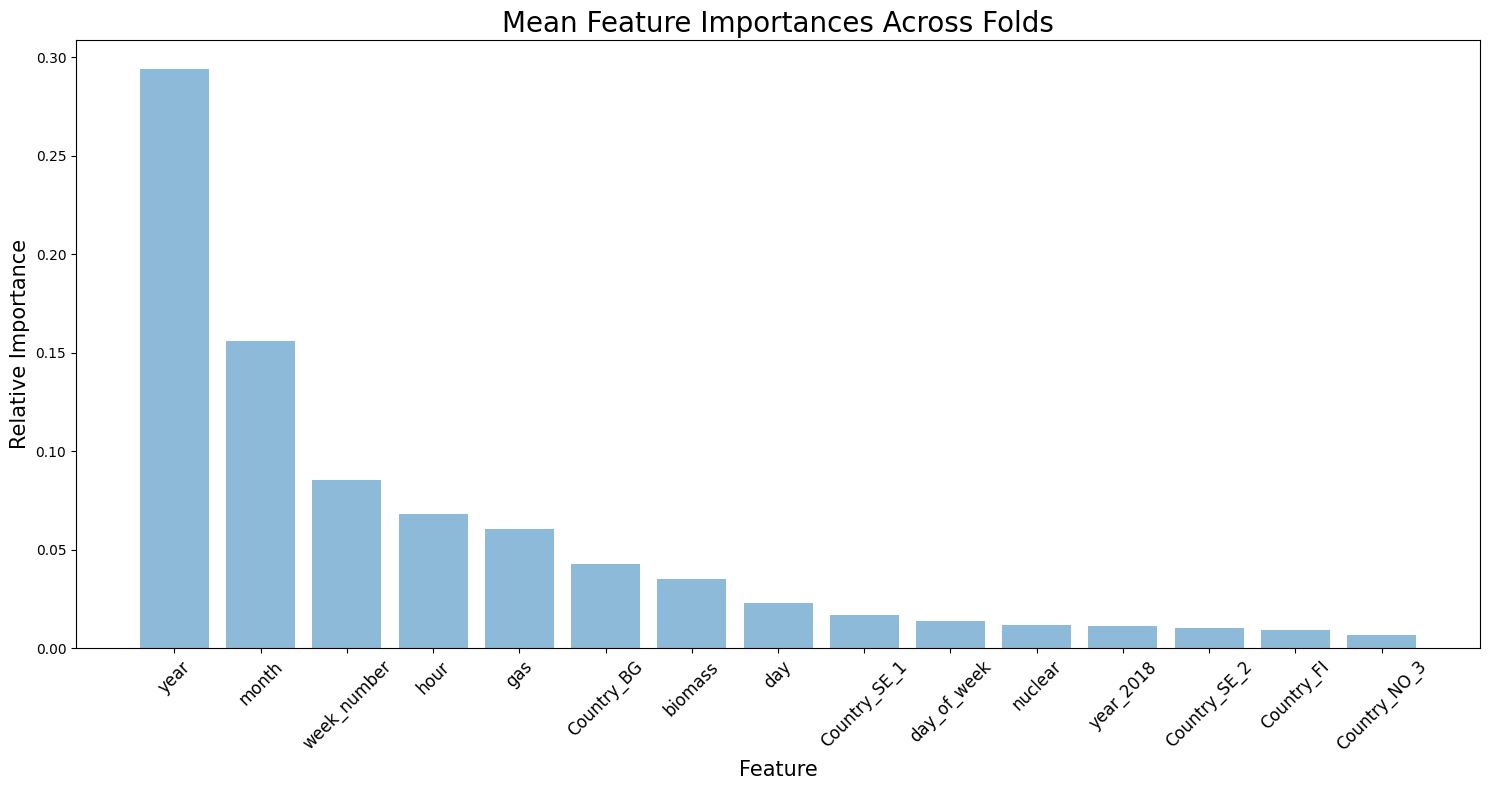

In [10]:
top_features = 15
plt.figure(figsize=(15, 8))
plt.title('Mean Feature Importances Across Folds', fontsize=20)
bars = plt.bar(range(top_features), mean_feature_importance[sorted_indices][:top_features], align='center', alpha=0.5)
plt.xticks(range(top_features), X_train_2.columns[sorted_indices][:top_features], rotation=45, fontsize=12)  
plt.ylabel('Relative Importance', fontsize=15)
plt.xlabel('Feature', fontsize=15)
plt.tight_layout()
plt.show()

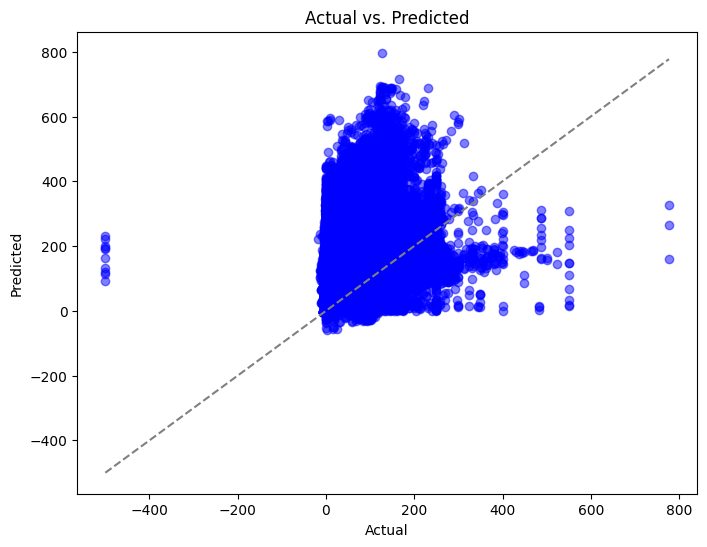

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_2, predictions_2, color='blue', alpha=0.5)
plt.plot([y_test_2.min(), y_test_2.max()], [y_test_2.min(), y_test_2.max()], color='gray', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()


In [21]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test_2, predictions_2)
print("Mean Absolute Error:", mae)

# Calculate R-squared
r_squared = r2_score(y_test_2, predictions_2)
print("R-squared:", r_squared)

Mean Absolute Error: 84.05360051491654
R-squared: -3.640089618401806


In [15]:
filtered_rows.isnull().values.any()

False

In [6]:
dates_cleaned['Country_Combined_DE_LU_DE_AT_LU'].unique()

KeyError: 'Country_Combined_DE_LU_DE_AT_LU'

In [42]:
dates_cleaned[dates_cleaned['Country'] == 'DE_AT_LU']

KeyError: 'Country'

In [40]:
dates_cleaned

,Unnamed: 0,Date,Country,energy_price,biomass,gas,nuclear,year,month,day,hour,week_number,day_of_week
0,1976013,2015-01-01 00:00:00,CH,44.94,434.052289,1180.283774,7185.089448,2015,1,1,0,1,3
1,1976014,2015-01-01 00:00:00,CZ,26.48,135.000000,172.000000,2596.000000,2015,1,1,0,1,3
2,1976017,2015-01-01 00:00:00,DK_1,25.02,18.000000,233.000000,7185.089448,2015,1,1,0,1,3
3,1976018,2015-01-01 00:00:00,DK_2,27.38,25.000000,304.000000,7185.089448,2015,1,1,0,1,3
4,1976019,2015-01-01 00:00:00,EE,27.38,434.052289,1180.283774,7185.089448,2015,1,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371335,5551058,2023-12-31 00:00:00,SE_2,44.87,434.052289,1180.283774,7185.089448,2023,12,31,0,52,6
3371336,5551059,2023-12-31 00:00:00,SE_3,44.87,434.052289,1180.283774,7185.089448,2023,12,31,0,52,6
3371337,5551060,2023-12-31 00:00:00,SE_4,44.87,434.052289,1180.283774,7185.089448,2023,12,31,0,52,6
3371338,5551061,2023-12-31 00:00:00,SI,33.30,434.052289,1180.283774,7185.089448,2023,12,31,0,52,6


In [5]:
dates_cleaned['new_category'] = dates_cleaned.apply(lambda row: 'Combined_AT_DE_AT_LU' 
                              if (row['Country'] in ['AT', 'DE_LU'] and row['datetime'].year <= 2018) 
                              else row['Country'], axis=1)

In [23]:
dates_cleaned_fulter = dates_cleaned[dates_cleaned['Country'] == 'AT']

In [24]:
dates_cleaned_fulter.head(70)

,Unnamed: 0,Date,Country,energy_price,biomass,gas,nuclear,year,month,day,hour,week_number,day_of_week,new_category


In [ ]:
filtered_df = df[df['country_code'] == 'Combined_AT_DE_AT_LU']